# Project 2 - Reinforcement Learning - MO436

**Group:** 
* Arthur Guazzelli (234984)
* Elian Laura (265685)
* Iury Cleveston (230216)
* Maria Tejada (197488)

## 1) Environment Description

In this project, we used the FrozenLake $8\times8$ environment from OpenAi Gym. This environment is represented as a grid with $8\times8$ tiles, where the goal is to cross the entire board without falling into ice holes. Frozen Lake is an episodic environment, where the initial state (S) is in the top-left position, and the terminal states are either the ice holes (H) or the final goal in the bottom-right tile (G). The ice holes are spread across the board, and the agent should find a path to the goal through frozen tiles (F); the reward of value of $1$ is only given at this point.

<br>
<div>
<center><img src="frozenLake.png" width="180"/></center>
<center>Figure 1 - Frozen Lake Grid.</center>
</div>


The current state is represented as a single number corresponding to the tile where the agent has entered, ranging from $0$ to $63$; therefore, this environment is discrete and partial observable. The possible actions are moving north, east, south, and west. Frozen Lake is presented in a deterministic and stochastic way; the difference is in the slippery ice, where the agent might slip and move to one of the four directions.

The ice holes are close to feasible paths to the goal; also, the reward is delayed until the end. These characteristics make Frozen Lake a challenging environment, especially in the stochastic version, where the dynamics are unpredictable.

Codes are available at https://github.com/thurbridi/mo436-project-1

Video are available at https://www.youtube.com/watch?v=S3_mXpYOIWU

In [ ]:
import sys
sys.path.insert(0, '../src')

## 2) Off-policy methods

### 2.1) DQN (Elian)

Reinforcement learning is well-suited to situations in which all possible states can be managed (iterated) and stored in standard computer RAM memory. The traditional Reinforcement Learning approach, on the other hand, is not very relevant in situations when the number of states exceeds the capabilities of modern computers (for example, there are 12833600 states in Atari games).


Bearing in mind the complexity of environment the agent has to operate in (number of states, continuous control) the standard well defined Reinforcement Learning Q — table is replaced by Deep Neural Network (Q — Network) which proceeds as a as nonlinear approximation which maps both state into an action value. Network architecture, choice of network hyper parameters and learning is performed during training phase (learning of Q — Network weight).

The DQN uses the experience replay memory function for the training. It saves the transitions that the agent notices so that we can use the information later. The transitions that make up a batch are decorrelated by randomly sampling from it. As a result, the DQN training technique is considerably stabilized and improved.

Another characteristic of DQN it follows an off-policy learning, that means to evaluate and improve a policy that is different from Policy taht is used for action selection.  An off-policy learner learns the value of the optimal policy independently of the agent's actions. 

A common strategy is epsilon-greedy. In short, epsilon-greedy means pick the current best option ("greedy") most of the time, but pick a random option with a small (epsilon) probability sometimes.

**Loss Function:**


Our aim will be to train a policy that tries to maximize the discounted, cumulative reward $R_{t_0} = \sum_{t=t_0}^{\infty} \gamma^{t - t_0} r_t$ where  $R_{t_0}$ is also known as the *return*. The discount, $\gamma$ should be a constant between $0$ and $1$ that ensures the sum converges. It makes rewards from the uncertain far future less important for our agent than the ones in the near future that it can be fairly confident about.

For our training update rule, we’ll use a fact that every $Q$ function for some policy obeys the Bellman equation:
$$ Q^{\pi}(s, a) = r + \gamma Q^{\pi}(s', \pi(s')) $$


The difference between the two sides of the equality is known as the temporal difference error, $\gamma$:

$$ \delta = Q(s, a) - (r + \gamma \max_a Q(s', a)) $$




Similarly, to supervised learning, in DQN, we can define the loss function, to minimize the error, as the squared difference between the target and predicted value, and we will also try to minimize the loss by updating the weights (assuming that the Agent performs a transition from one state s to the next state s’ by performing some action a and receive a reward r).

$$ Loss(\delta) = (Q(s, a) - (r + \gamma \max_a Q(s', a)))^{2} $$

**Training:**


During the learning process we use two separate Q-networks (Q_network_local and Q_network_target) to calculate the predicted value (weights θ) and target value (weights θ’). The target Q-network is frozen for several time steps and then the target network weights are updated by copying the weights from the actual Q-network. Freezing the target Q-network for a while and then updating its weights with the actual Q-network weights stabilizes the training.

This kind of learning proces makes the algorithm more stable compared to standard online Q-learning, where an update
that increases $Q(s_{t},a_{t})$ often also increases $Q(s_{t+1},a)$ for all $a$ and hence also increases the target $y_{j}$, possibly leading to oscillations or divergence of the policy.

**Implementation:**


For the implementation we use the Pytorch framework. We have two main classes:
- class Agent 
- class Net

The next are the functions signature per class.
```
class Agent(object):
    def __init__(self, epsilon, gamma, state_space, action_space, model):
    def select_action(self, state):        
    def remember(self, Q1, action, reward):
    def save_model(self, param):
    def load_model(self, param):
    def train(self, train):
```

```
from torch import nn
class Net(nn.Module):
    def __init__(self, state_space, action_space):
    def _weights_init(m):
    def forward(self, x):
```

In order to find the best hyperparameter values for the training process, we use GridSearch technique. The next are the set of values:

* $\text{gamma} \in [0.95, 0.97, 0.99]$,
* $\text{epsilon} \in [0.01, 0.001]$,
* $\text{learning rate} \in [0.1, 0.01, 0.001, 0.0001]$

In regard to the number of episodes and steps, only one value per each one was fixed, it is a decision after run many experiments with another values.

* $\text{episodes} \in [5000]$,
* $\text{steps} \in [200]$

#### 2.2.1) Deterministic Environment

In a deterministic FrozenLake environment.

In [ ]:
env = gym.make('FrozenLake8x8-v0',  is_slippery=False)

In [ ]:
param_grid = {'episodes': [5000], 'steps': [200], 'gamma': [0.95, 0.97, 0.99], 'e':[0.01, 0.001], 'lr':[0.1, 0.01, 0.001, 0.0001] }

In [ ]:
gridSearch(param_grid, env, results)

In [ ]:
results

,comb,episodes,steps,gamma,e,lr,wins,Success Ep,elapsed time (s)
0,0.0,5000.0,200.0,0.95,0.010,0.1000,38.0,0.0076,873.356892
1,1.0,5000.0,200.0,0.95,0.010,0.0100,36.0,0.0072,862.102957
2,2.0,5000.0,200.0,0.95,0.010,0.0010,4.0,0.0008,847.043669
3,3.0,5000.0,200.0,0.95,0.010,0.0001,0.0,0.0000,875.743556
4,4.0,5000.0,200.0,0.97,0.010,0.1000,41.0,0.0082,880.695777
5,5.0,5000.0,200.0,0.97,0.010,0.0100,35.0,0.0070,861.989435
6,6.0,5000.0,200.0,0.97,0.010,0.0010,0.0,0.0000,886.613179
7,7.0,5000.0,200.0,0.97,0.010,0.0001,16.0,0.0032,875.096257
8,8.0,5000.0,200.0,0.99,0.010,0.1000,41.0,0.0082,870.155082
9,9.0,5000.0,200.0,0.99,0.010,0.0100,31.0,0.0062,860.030229


The table shows 24 combinations whit the next addtional columns:



*   **wins**: the total number of wins in 5000 episodes
*   **success ep**: wins/ episodes
*   **elapsed time**: Number of seconds to run 5000 episodes with the respective hyperparameter values.



**Analyzing the best results**

As we can see, the model 14 (Exp-14) has the highest wins value. The second best model are 4 and 8 with 41 wins, the difference with Exp-14 is a lot.

**Exp-14**

* Total wins = 4075
* success ep = 0.8150
* elapsed time = 194.8372 s
* gamma = 0.95
* epsilon = 0.001
* learning_rate = 0.001  


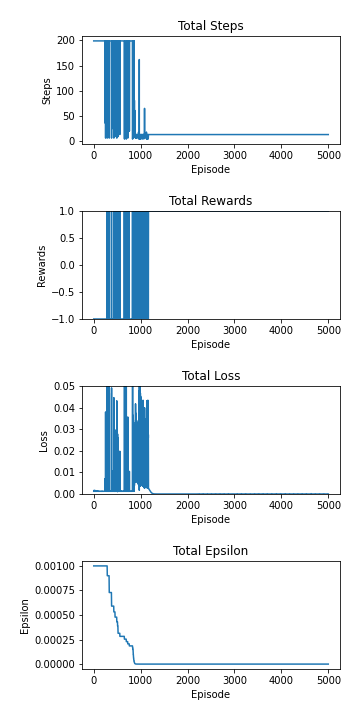

Find the remain result graphics [here](https://drive.google.com/drive/folders/1-5nHnRzwQky_9v6xDriZdRPRu5OEu3tt?usp=sharing).

**Testing**

Using the best model we run it in Test phase.

In [ ]:
test_frozenLake_deterministic(best_model)

  0%|          | 0/1 [00:00<?, ?it/s]

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFF

100%|██████████| 1/1 [00:07<00:00,  7.03s/it]


```
actions_names = ['l', 's', 'r', 'n']

l: left
s: south
r: right
n: north
```

In [ ]:
show_best_actions()

['r', 'r', 'r', 'r', 'r', 's', 'r', 's', 'r', 's', 's', 's', 's', 's']


In [ ]:
number_steps()

14

#### 2.2.2) Schocastic Environment

In a schocastic FrozenLake environment, it means with slippery path.

In [ ]:
env = gym.make('FrozenLake8x8-v0',  is_slippery=True)

In [ ]:
param_grid = {'episodes': [5000], 'steps': [200], 'gamma': [0.95, 0.97, 0.99], 'e':[0.01, 0.001], 'lr':[0.1, 0.01, 0.001, 0.0001] }

In [ ]:
gridSearch(param_grid, env, results)

In [ ]:
results

,comb,episodes,steps,gamma,e,lr,wins,Success Ep,elapsed time (s)
0,0.0,5000.0,200.0,0.95,0.010,0.1000,57.0,0.0114,968.335433
1,1.0,5000.0,200.0,0.95,0.010,0.0100,44.0,0.0088,955.759223
2,2.0,5000.0,200.0,0.95,0.010,0.0010,2171.0,0.4342,461.252382
3,3.0,5000.0,200.0,0.95,0.010,0.0001,14.0,0.0028,196.077793
4,4.0,5000.0,200.0,0.97,0.010,0.1000,58.0,0.0116,957.397809
5,5.0,5000.0,200.0,0.97,0.010,0.0100,90.0,0.0180,984.809744
6,6.0,5000.0,200.0,0.97,0.010,0.0010,23.0,0.0046,885.253790
7,7.0,5000.0,200.0,0.97,0.010,0.0001,0.0,0.0000,445.987657
8,8.0,5000.0,200.0,0.99,0.010,0.1000,57.0,0.0114,961.957384
9,9.0,5000.0,200.0,0.99,0.010,0.0100,304.0,0.0608,957.601936


The table shows 24 combinations whit the next addtional columns:



*   **wins**: the total number of wins in 5000 episodes
*   **success ep**: wins/ episodes
*   **elapsed time**: Number of seconds to run 5000 episodes with the respective hyperparameter values.



**Analyzing the best results**

The following are the two best experiments (Exp) with highest results from 24 experiments. In regard to the differences, we have:
- Exp-21 reached 0.77 win rate in 5000 episodes.
- Exp-10 reached 0.76 win rate in 5000 episodes.
- The Exp-21 learning rate is greater than the Exp-23. 0.01 for Exp-22 and 0.001 for Exp-10
- Gamma value is the same in both: 0.99 and epsilon value is greater in Exp-10 (0.01) than Exp-21 (0.001).

**Exp-21**

* Total wins = 3828
* success ep = 0.7656
* elapsed time =  501.8215 s
* gamma = 0.99
* epsilon = 0.001
* learning_rate = 0.01 


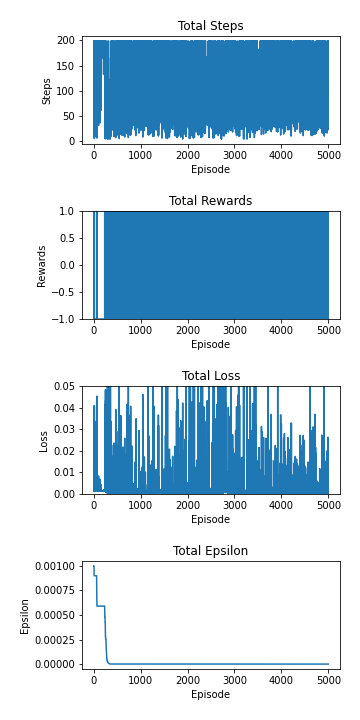

Find the remain result graphics [here](https://drive.google.com/drive/folders/1-5nHnRzwQky_9v6xDriZdRPRu5OEu3tt?usp=sharing).

**Testing**

Using the best model we run it in Test phase.

In [ ]:
test_frozenLake_schocastic(best_model)

  0%|          | 0/1 [00:00<?, ?it/s]

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF


100%|██████████| 1/1 [00:04<00:00,  4.21s/it]

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


```
actions_names = ['l', 's', 'r', 'n']

l: left
s: south
r: right
n: north
```

In [ ]:
show_best_actions()

['r', 'r', 'r', 'r', 'r', 'r', 'n', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r']


In [ ]:
number_steps()

171

As we can see, the results don't have a clear pattern. The main values are the hyperparamenters of the neural network, in contrast to a classical q-learning (tabular or with linear approximation) a deep approach implies to run more experiments to seek the best hyperparameters set. For the other side DQN follows an off-policy learning, it means a $Q(s', a') function is learned from taking different actions (for example, random actions) through a e-greedy strategy for example. It doesn't need a policy at all.

### 2.2) SAC (Maria)


Soft Actor-Critic (SAC) is an algorithm that optimizes a stochastic policy in an off-policy way. 
A central feature of SAC is entropy regularization. The policy is to train to maximize a trade-off between expected return and entropy, a measure of randomness in the policy. This closely connects to the exploration-exploitation trade-off: increasing entropy results in more exploration, which can accelerate learning later on. It can also prevent the policy from prematurely converging to a bad local optimum. 


**Entropy-Regularized RL**

Let $x$ be a random variable with probability mass or density functions $P$. The entropy $H$ of $x$ is computed from its distribution $P$ according to:

<br><center>
  $$H(P) = \underset{x \sim P}{\mathbb{E}}[-\log P(x)]$$
<center>

In entropy-regularized reinforcement learning, the agent gets a bonus reward at each time step proportional to the entropy of the policy at that timestep. This changes the RL problems to:

<br><center>
  $$\pi^{*} = \underset{\pi}{\text{arg max}} \; \underset{\tau \sim \pi}{\mathbb{E}} \left [\displaystyle \sum^{\infty}_{t=0} \gamma^t \Biggl( R(s_t, a_t, s_{t+1}) + \alpha H(\pi(\centerdot | s_t)) \Biggl) \right]$$
<center>

where $\alpha > 0$ is the trade-off coefficient. We can noew define the slightly-diffent value functions in this setting. $V^{\pi}$ is changed to include the entropy bonuses from every timestep:
    
<br><center>
  $$V^{\pi}(s) = \underset{\tau \sim \pi}{\mathbb{E}} \left[\displaystyle \sum^{\infty}_{t=0} \gamma^t \Biggl( R(s_t, a_t, s_{t+1}) + \alpha H(\pi(\centerdot | s_t)) \Biggl) \Biggl| s_0 = s \right]$$
<center> 
    
$Q^{pi}$ is changed to include the entropy bonuses from every timestep except the first:

<br><center>
  $$Q^{\pi}(s,a) = \underset{\tau \sim \pi}{\mathbb{E}} \left[\displaystyle \sum^{\infty}_{t=0} \gamma^t R(s_t, a_t, s_{t+1}) + \alpha^t \sum^{\infty}_{t=0} H(\pi(\centerdot | s_t)) \Biggl| s_0 = s, a_0 = a \right]$$
<center>    

With the definitions, $V^{\pi}$ and $Q^{\pi}$ are connected by:
    
<br><center>
  $$V^{\pi}(s) = \underset{a \sim \pi}{\mathbb{E}}[Q^{\pi}(s,a)] + \alpha H(\pi(\centerdot|s))$$
<center>
    
and the Bellman equation for $Q^{\pi}$ is

<br><center>
  $$Q^{\pi}(s,a) = \underset{s' \sim P}{\mathbb{E}}[R(s,a,s') + \gamma V^{\pi}(s')]$$
<center>

SAC concurrently learns a policy $\pi_\theta$ and two Q-functions $Q_{\phi_1}$, $Q_{\phi_2}$. There are two variants of SAC that are currently standard: one that uses a fixed entropy regularizaiton coefficient $\alpha$, and another that enforces an entropy constraint by varying $\alpha$ over the course of training. 

**$Q$-loss**

In the final form of the $Q$-loss, let's take a moment to discuss how the contribution from entropy regularization comes in. It will start by taking its recursive Bellman equation ofr the entropy-regularized $Q^{\pi}$ from earlier, and rewriting it a little bit by using the definition of entropy:


<br><center>
  $$Q^{\pi}(s,a) = \underset{\substack{s'\sim P \\ a' \sim \pi}}{\mathbb{E}} \left[R(s, a, s') + \gamma \Bigl( Q^{\pi}(s',a') + \alpha H(\pi(\centerdot | s')) \Bigl)  \right]$$
  $$Q^{\pi}(s,a) = \underset{\substack{s'\sim P \\ a' \sim \pi}}{\mathbb{E}} \left[R(s, a, s') + \gamma \Bigl( Q^{\pi}(s',a') - \alpha \, \text{log} \pi(\centerdot | s') \Bigl)  \right]$$
<center>    
    
The RHS is an expectation over next states (which come from the replay buffer) and next actions (which come from the current policy, and **not** the replay buffer). Since it's an expectation, we can approximate it with samples:

    
<br><center>
  $$Q^{\pi}(s,a) \approx r + \gamma \Bigl(Q^{\pi}(s', \tilde{a}') - \alpha \, \text{log}\pi(\tilde{a}'|s')\Bigl), \;\;\; \tilde{a}' \sim \pi(\centerdot | s')$$
<center>    
 

SAC sets up the MSBE loss for each $Q$-function using this kind of sample approximation for the target. THe only thing still undetermined here is which $Q$-function gets used to compute the sample backup; SAC uses the clipped double-$Q$ trick, and takes the minimum $Q$-value between the two $Q$ approximators. 

Putting it all together, the loss functions for the $Q$-networks in SAC are:

<br><center>
  $$L(\phi_i, D) = \underset{(s,a,r,s',d) \sim D}{\mathbb{E}} \left[\Bigl((Q_{\phi_i}(s, a) - y(r,s',d) \Bigl)^2  \right]$$
  $$y(r,s',d) = r + \gamma(1-d) \Bigl( \underset{j=1,2}{\text{min}} Q_{\phi{\text{targ},j}}(s',\tilde{a}') - \alpha \, \text{log} \pi_{\theta}(\tilde{a}'|s')  \Bigl), \;\;\; \tilde{a}' \sim \pi_{\theta}(\centerdot | s')$$  
<center> 
    
**Learning the Policy**
    
The policy should, in each state, act to maximize the expected future return plus expected future entropy. That is, it should maximize $V^{\pi}(s)$, which is expand out into:

<br><center>
  $$V^{\pi}(s) = \underset{a \sim \pi}{\mathbb{E}} [Q^{\pi}(s, a)] + \alpha H(\pi(\centerdot | s))$$
  $$V^{\pi}(s) = \underset{a \sim \pi}{\mathbb{E}} [Q^{\pi}(s,a) - \alpha \, \text{log}\pi(a|s))]$$  
<center> 
    

 

We use keras_gym to carry out the corresponding tests in the chosen environment. This implementation is based on an off-policy actor-critic deep RL algorithm based on the maximum entropy reinforcement learning framework. In this framework, the actor maximizes the expected reward while also maximizing the entropy. We used the linear function approximator.

#### 2.2.1) Deterministic Environment

In [ ]:
from SAC import *

2021-12-04 01:00:11.084876: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-04 01:00:11.084913: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/home/marta2/miniconda3/envs/mo436/lib/python3.9/site-packages/keras_gym/base/patches.py:23: UserWarning: keras-gym has known issues with eager execution mode; eager execution has been disabled as a precaution. You may try and enable eager execution with: tf.compat.v1.enable_eager_execution()
  warnings.warn(


The first experiment consisted in applying the SAC in deterministic environment. Therefore, we used a grid search techniques to find the best solution given the parameters defined as:

* $\text{episode} \in [1000]$,
* $\text{target model sync period} \in [10]$,
* $\text{learning rate} \in [0.005]$,
* $\tau \in [1.0, 0.5]$,
* $\text{punishment} \in [-0.25, -0.1, -0.01]$.

This algorithm took a long time to search for parameters, so the parameters were chosen incrementally, to see which parameters were obtained results. Therefore, some parameters only show a single variable. Furthermore, it was tested with two 2 approximators: linear and MLP; however MLP did not have very good results, so the results are only shown with a linear approximator. 

In [ ]:
result = search_params(False, 6)

In [ ]:
result

,model_sync_period,episodes,lr,tau,punishment,reward_train,reward,elapsed time (s)
0,10.0,1000.0,0.005,1.0,-0.25,2.2,0.0,123.896235
1,10.0,1000.0,0.005,0.5,-0.25,1.2,0.0,120.049838
2,10.0,1000.0,0.005,1.0,-0.10,24.9,100.0,170.929226
3,10.0,1000.0,0.005,0.5,-0.10,37.6,100.0,182.357239
4,10.0,1000.0,0.005,1.0,-0.01,60.3,100.0,649.997202
5,10.0,1000.0,0.005,0.5,-0.01,0.1,0.0,1901.403648


In [ ]:
env = gym.make('FrozenLake8x8-v0', is_slippery=False)
env = km.wrappers.TrainMonitor(env, tensorboard_dir=tbdir)

#km.enable_logging()
func, sac, pi, Reward = sac_train(env, 1000 ,10 , 0.005, 1.0, -0.1)

Text(0, 0.5, 'reward')

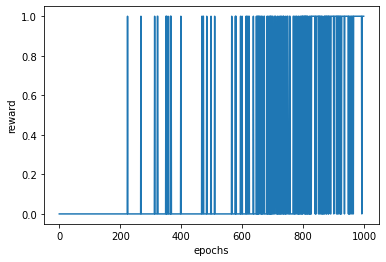

In [ ]:
plt.plot(Reward)
plt.xlabel('epochs')
plt.ylabel('reward')

In [ ]:
sac_test(env, sac, num_test=1, display=True)


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
 v(s) = 0.256
 pi(L|s) = 0.001
 pi(S|s) = 0.239
 pi(R|s) = 0.759
 pi(N|s) = 0.001
 q1(s,L) = -0.005
 q1(s,S) = 0.241
 q1(s,R) = 0.257
 q1(s,N) = 0.265
 q2(s,L) = -0.005
 q2(s,S) = 0.241
 q2(s,R) = 0.257
 q2(s,N) = 0.265
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
 v(s) = 0.317
 pi(L|s) = 0.001
 pi(S|s) = 0.130
 pi(R|s) = 0.867
 pi(N|s) = 0.001
 q1(s,L) = 0.031
 q1(s,S) = 0.330
 q1(s,R) = 0.244
 q1(s,N) = 0.243
 q2(s,L) = 0.031
 q2(s,S) = 0.330
 q2(s,R) = 0.244
 q2(s,N) = 0.243
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
 v(s) = 0.256
 pi(L|s) = 0.002
 pi(S|s) = 0.223
 pi(R|s) = 0.773
 pi(N|s) = 0.002
 q1(s,L) = -0.010
 q1(s,S) = 0.271
 q1(s,R) = 0.256
 q1(s,N) = 0.267
 q2(s,L) = -0.010
 q2(s,S) = 0.271
 q2(s,R) = 0.256
 q2(s,N) = 0.267
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
 v(s) = 0.283
 pi(L|s) 

INFO:TrainMonitor:ep: 1001, T: 10,630, G: 1, avg_G: 0.728, t: 14, dt: 72.063ms, loss: 0.00167, policy/entropy: 0.334, policy/loss: -0.00228, v_func/loss: 0.00205, q_func1/loss: 0.000454, q_func2/loss: 0.000454, value/loss: 0.000985


  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
 v(s) = 0.456
 pi(L|s) = 0.003
 pi(S|s) = 0.918
 pi(R|s) = 0.077
 pi(N|s) = 0.003
 q1(s,L) = 0.290
 q1(s,S) = 0.458
 q1(s,R) = 0.341
 q1(s,N) = 0.324
 q2(s,L) = 0.290
 q2(s,S) = 0.458
 q2(s,R) = 0.341
 q2(s,N) = 0.324
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
 v(s) = 0.508
 pi(L|s) = 0.001
 pi(S|s) = 0.977
 pi(R|s) = 0.021
 pi(N|s) = 0.001
 q1(s,L) = 0.250
 q1(s,S) = 0.518
 q1(s,R) = -0.011
 q1(s,N) = 0.240
 q2(s,L) = 0.250
 q2(s,S) = 0.518
 q2(s,R) = -0.011
 q2(s,N) = 0.240
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
 v(s) = 0.567
 pi(L|s) = 0.001
 pi(S|s) = 0.025
 pi(R|s) = 0.974
 pi(N|s) = 0.001
 q1(s,L) = 0.106
 q1(s,S) = 0.276
 q1(s,R) = 0.572
 q1(s,N) = 0.133
 q2(s,L) = 0.106
 q2(s,S) = 0.276
 q2(s,R) = 0.572
 q2(s,N) = 0.133
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
 v(s) = 0.635
 pi(L

1.0

#### 2.2.2) Stochastic Environment 

The first experiment consisted in applying the SAC in deterministic environment. Therefore, we used a grid search techniques to find the best solution given the parameters defined as:

* $\text{episode} \in [2000]$,
* $\text{target model sync period} \in [10, 25]$,
* $\text{learning rate} \in [0.1]$,
* $\tau \in [1.0]$,
* $\text{punishment} \in [-0.25, -0.1, -0.01]$.

In [ ]:
result = search_params(True, 6)

In [ ]:
result

,model_sync_period,episodes,lr,tau,punishment,reward_train,reward,elapsed time (s)
0,10.0,2000.0,0.1,1.0,-0.25,9.05,0.0,998.666311
1,25.0,2000.0,0.1,1.0,-0.25,0.10,0.0,972.110419
2,10.0,2000.0,0.1,1.0,-0.10,0.15,0.0,1164.916098
3,25.0,2000.0,0.1,1.0,-0.10,0.90,0.0,686.845289
4,10.0,2000.0,0.1,1.0,-0.01,11.60,34.0,879.788472
5,25.0,2000.0,0.1,1.0,-0.01,0.25,0.0,527.925470


In [ ]:
env = gym.make('FrozenLake8x8-v0', is_slippery=True)
env = km.wrappers.TrainMonitor(env, tensorboard_dir=tbdir)

#km.enable_logging()
func, sac, pi, Reward = sac_train(env, 2000 ,10 , 0.1, 1.0, -0.01)

Text(0, 0.5, 'reward')

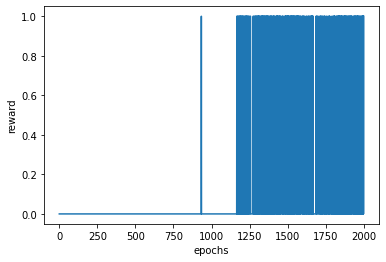

In [ ]:
plt.plot(Reward)
plt.xlabel('epochs')
plt.ylabel('reward')

In [ ]:
sac_test(env, sac, num_test=1, display=True)


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
 v(s) = 1.182
 pi(L|s) = 0.000
 pi(S|s) = 0.000
 pi(R|s) = 1.000
 pi(N|s) = 0.000
 q1(s,L) = -1.887
 q1(s,S) = -0.243
 q1(s,R) = -1.653
 q1(s,N) = -1.165
 q2(s,L) = -1.887
 q2(s,S) = -0.243
 q2(s,R) = -1.653
 q2(s,N) = -1.165
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
 v(s) = 1.351
 pi(L|s) = 0.000
 pi(S|s) = 0.000
 pi(R|s) = 1.000
 pi(N|s) = 0.000
 q1(s,L) = -6.221
 q1(s,S) = -0.977
 q1(s,R) = -1.014
 q1(s,N) = 0.608
 q2(s,L) = -6.221
 q2(s,S) = -0.977
 q2(s,R) = -1.014
 q2(s,N) = 0.608
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
 v(s) = -1.842
 pi(L|s) = 0.000
 pi(S|s) = 0.000
 pi(R|s) = 1.000
 pi(N|s) = 0.000
 q1(s,L) = -4.010
 q1(s,S) = -1.484
 q1(s,R) = 0.969
 q1(s,N) = 0.045
 q2(s,L) = -4.010
 q2(s,S) = -1.484
 q2(s,R) = 0.969
 q2(s,N) = 0.045
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
 v(s) = 

 q1(s,L) = -3.234
 q1(s,S) = -0.336
 q1(s,R) = -0.669
 q1(s,N) = 0.224
 q2(s,L) = -3.234
 q2(s,S) = -0.336
 q2(s,R) = -0.669
 q2(s,N) = 0.224
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
 v(s) = -0.886
 pi(L|s) = 0.000
 pi(S|s) = 0.000
 pi(R|s) = 1.000
 pi(N|s) = 0.000
 q1(s,L) = -2.769
 q1(s,S) = -1.090
 q1(s,R) = -1.083
 q1(s,N) = -0.850
 q2(s,L) = -2.769
 q2(s,S) = -1.090
 q2(s,R) = -1.083
 q2(s,N) = -0.850
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
 v(s) = -0.886
 pi(L|s) = 0.000
 pi(S|s) = 0.000
 pi(R|s) = 1.000
 pi(N|s) = 0.000
 q1(s,L) = -2.769
 q1(s,S) = -1.090
 q1(s,R) = -1.083
 q1(s,N) = -0.850
 q2(s,L) = -2.769
 q2(s,S) = -1.090
 q2(s,R) = -1.083
 q2(s,N) = -0.850
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
 v(s) = -0.272
 pi(L|s) = 0.000
 pi(S|s) = 1.000
 pi(R|s) = 0.000
 pi(N|s) = 0.000
 q1(s,L) = -3.234
 q1(s,S) = -0.336
 q1(s,R) = -0.669
 q1(s,N) = 0.224
 q2(s

 q2(s,L) = -3.401
 q2(s,S) = -0.359
 q2(s,R) = -0.553
 q2(s,N) = -0.630
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
 v(s) = -0.487
 pi(L|s) = 0.000
 pi(S|s) = 0.000
 pi(R|s) = 1.000
 pi(N|s) = 0.000
 q1(s,L) = -3.401
 q1(s,S) = -0.359
 q1(s,R) = -0.268
 q1(s,N) = 0.467
 q2(s,L) = -3.401
 q2(s,S) = -0.359
 q2(s,R) = -0.268
 q2(s,N) = 0.467
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
 v(s) = -0.487
 pi(L|s) = 0.000
 pi(S|s) = 0.000
 pi(R|s) = 1.000
 pi(N|s) = 0.000
 q1(s,L) = -3.401
 q1(s,S) = -0.359
 q1(s,R) = -0.268
 q1(s,N) = 0.467
 q2(s,L) = -3.401
 q2(s,S) = -0.359
 q2(s,R) = -0.268
 q2(s,N) = 0.467
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
 v(s) = 0.720
 pi(L|s) = 0.000
 pi(S|s) = 0.000
 pi(R|s) = 1.000
 pi(N|s) = 0.000
 q1(s,L) = -3.401
 q1(s,S) = -0.359
 q1(s,R) = 1.328
 q1(s,N) = -0.630
 q2(s,L) = -3.401
 q2(s,S) = -0.359
 q2(s,R) = 1.328
 q2(s,N) = -0.630
  (Right

 v(s) = 0.405
 pi(L|s) = 0.000
 pi(S|s) = 0.000
 pi(R|s) = 1.000
 pi(N|s) = 0.000
 q1(s,L) = -3.401
 q1(s,S) = -0.359
 q1(s,R) = -0.553
 q1(s,N) = -0.630
 q2(s,L) = -3.401
 q2(s,S) = -0.359
 q2(s,R) = -0.553
 q2(s,N) = -0.630
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
 v(s) = -0.487
 pi(L|s) = 0.000
 pi(S|s) = 0.000
 pi(R|s) = 1.000
 pi(N|s) = 0.000
 q1(s,L) = -3.401
 q1(s,S) = -0.359
 q1(s,R) = -0.268
 q1(s,N) = 0.467
 q2(s,L) = -3.401
 q2(s,S) = -0.359
 q2(s,R) = -0.268
 q2(s,N) = 0.467
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
 v(s) = 0.405
 pi(L|s) = 0.000
 pi(S|s) = 0.000
 pi(R|s) = 1.000
 pi(N|s) = 0.000
 q1(s,L) = -3.401
 q1(s,S) = -0.359
 q1(s,R) = -0.553
 q1(s,N) = -0.630
 q2(s,L) = -3.401
 q2(s,S) = -0.359
 q2(s,R) = -0.553
 q2(s,N) = -0.630
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
 v(s) = -0.663
 pi(L|s) = 0.000
 pi(S|s) = 0.000
 pi(R|s) = 1.000
 pi(N|s) = 

INFO:TrainMonitor:ep: 2005, T: 135,493, G: 1, avg_G: 0.337, t: 119, dt: 7.307ms, loss: 1.51, policy/entropy: 6.32e-05, policy/loss: -0.0429, v_func/loss: 0.391, q_func1/loss: 0.386, q_func2/loss: 0.386, value/loss: 0.388


 v(s) = 0.405
 pi(L|s) = 0.000
 pi(S|s) = 0.000
 pi(R|s) = 1.000
 pi(N|s) = 0.000
 q1(s,L) = -3.401
 q1(s,S) = -0.359
 q1(s,R) = -0.553
 q1(s,N) = -0.630
 q2(s,L) = -3.401
 q2(s,S) = -0.359
 q2(s,R) = -0.553
 q2(s,N) = -0.630
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
 v(s) = -0.487
 pi(L|s) = 0.000
 pi(S|s) = 0.000
 pi(R|s) = 1.000
 pi(N|s) = 0.000
 q1(s,L) = -3.401
 q1(s,S) = -0.359
 q1(s,R) = -0.268
 q1(s,N) = 0.467
 q2(s,L) = -3.401
 q2(s,S) = -0.359
 q2(s,R) = -0.268
 q2(s,N) = 0.467
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
 v(s) = 0.720
 pi(L|s) = 0.000
 pi(S|s) = 0.000
 pi(R|s) = 1.000
 pi(N|s) = 0.000
 q1(s,L) = -3.401
 q1(s,S) = -0.359
 q1(s,R) = 1.328
 q1(s,N) = -0.630
 q2(s,L) = -3.401
 q2(s,S) = -0.359
 q2(s,R) = 1.328
 q2(s,N) = -0.630
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
 v(s) = -0.487
 pi(L|s) = 0.000
 pi(S|s) = 0.000
 pi(R|s) = 1.000
 pi(N|s) = 0.

1.0

## 3) On-policy methods

### 3.1) REINFORCE (Iury)

### 3.2) PPO (Arthur)

## 4) Discussion